# Python Demons Project Progress Report
### Introduction
In this project, we have studied various datasets for Chicago Transit Authority (CTA) transportation. We analyzed different Datasets covering - CTA Daily Bus Ridership, CTA Monthly Bus Ridership, CTA Daily Train Ridership, CTA Monthly Train Ridership Monthly and CTA Overall Ridership Annually from the years 2001-2019 for all bus and train lines in Chicago.

Our goal is to analyze and predict the patterns and trends in the ridership in the city of Chicago. We will predict the ridership based on the area (which areas experience a rise in the ridership and which ones will experience a drop), Route popularity and general analysis of the CTA transport ridership

Our predictions could help the CTA manage it's transportation and allot finance accordingly. These predictions could also help in better preparedness in events like Covid-19 or Polar Vertex.

### Changes in Scope
Intially we planned to classify the smaller neighbourhood areas of chicago into more active than current/equally active/less active than current. But as the routes operate in large range of areas, predicting the classification of smaller areas is not feasible. However, we are still able to accurately predict the ridership of coarsily grained data and large areas. 

In [9]:
import Kasturi
import ARIMA
import pandas as pd
import os
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'Kasturi'

### Data Cleaning
We cleaned the data intially but the major cleaning happened on-the-go as we tried to scramble the data for exploratory analysis. We used following cleaning techniques on every dataset - 

Data cleaning was performed intially, but we performed most of it while analyzing the data and scrambling it for exploratory analysis. We used following cleaning techniques on all the datasets - 

- Removed NaN and double values
- Added day column to anayze daywise trends in the bus and train data over weekdays and weekends and each day
- Added year column and seperated it from the month column
- Adjust all the values for the leap year (normalized for an extra day)
- Converted String into Int in some cases of MonthTotal Column
- Dropped special routes which did not operate every month of all the years and routes which did not operate on weekdays
- Aggregated over days of the week to observe trends for each day
- Aggregated over year to find the trends and popularity of bus and train lines
- Dropped after merging Unnecessary Columns
- Extracted necessary features for ML
- Seperated columns with multiple entries (in Route column)

In [4]:
#Reading the file for daily ridership of the L 
py_data=pd.read_csv("./data/CTA_-_Ridership_-__L__Station_Entries_-_Daily_Totals.csv")

In [5]:
py_data = Kasturi.data_cleaning(py_data)

NameError: name 'Kasturi' is not defined

### Exploratory Data Analysis

####  Bus ridership
We found that over the years this bus routes changed Drastically (Increase or Decrease in ridership - 
['169', '1', '51', '2', '108', '171', '11', '28', '120', '100'] 
Heavy Snowing or Sudden Tempreature Drop Result in a significant drop (5-7%) as usual like during Polar Vertex of 2019.
Increased Downtown Routes in 2007 actually led to a huge gain in ridership.

Service Cuts of less popular routes in South region in 2009 led a significant drop in overall ridership due to misinformation among residents and exploration of other options.
Since Uber started operations in 2012 and introduction of cheaper options like Uber X and Uber Share, the ridership continue to decline steadily ever since.
Heavy road construction in Downtown was also the reason of high decrease in 2016 in ridership.
The share of total transportaion for Bus is decreasing while that of Train is increasing, both approaching equal percentages.

### CTA Train ridership
The train ridership has grown as compared to the bus ridership. The ridership has shifted from South Chicago to downtown due to the boom in the business and the high saturation of train lines in the loop area. However, there is a decline in the rail riders since the past 4 years due to the increase in price of the CTA pass and the increase in popularity of competitve train lines such as the Metra.  Also, the growing popularity of Uber and lyft have led to a decline in the passengers preferring to travel by CTA trains.

In [4]:
py_data_pivot = Kasturi.perform_eda(py_data)

##### The CTA train ridership has plummeted over the past 4 years due to the commuter movement to other competetive trains like metra

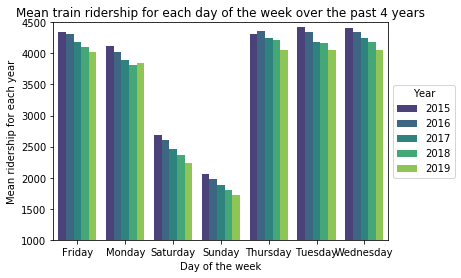

In [5]:
Kasturi.day_of_week(py_data_pivot)

The reason behind the declinein ridership could be due to the increase in popularity of Metra since 2017, especially in the southern parts of Chicago. Another possible reason could be that CTA increased the price of passes without increasing the price of a single ride in 2014. Also, in 2015, the introduction of permanent Ventra card system replaced the disposable passes, confusing for the general public.Another important factor is that the ridership has reduced due to the growth in Uber and Lyft

10 Most popular train station race from 2001 to 2020 using animated bar plot.
- Link:

#### Intresting Hypothesis
In many of the CTA annual reports, it is stated that the ridership declined at some points due to decrease in GAS prices. We tested the correlation between the GAS price and total ridership. It turned out to be a mere 0.095. Hence it can be easily concluded that they are not correlated. The graph accurately depicts the same.

### Machine Learning Analysis

#### 1. Using LSTM to predict the total ridership of the BUS in coming months
We used LSTM to predict the ridership over the years. We used 18 layers of LAG and 100 Epoche to find the prediction for the Ridership of Bus. Our Test Accuracy is 85.6% which is underfitting and we are trying to improve it to maximum possible. The baseline accuracy (using mean) turned out to be a mere 23% accurate.

#### 2. Using ARIMA to predic the average monthly ridership of each bus and train station
Using Autoregressive integrated moving average (ARIMA), we were able to accurately predict the average monthly ridership for each month of the year 2019 by upto ~ 95% accuracy. This was done by training on previous 18 years of data (2001 - 2018). 

Test Absolute Percentage Error: 0.02522


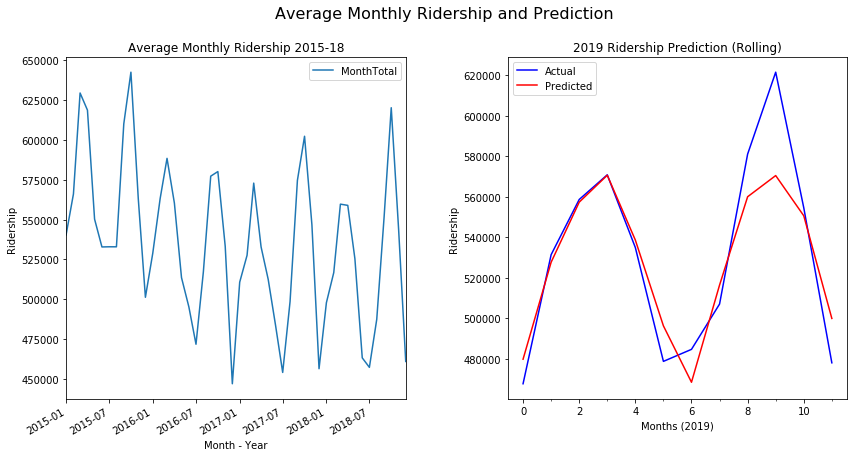

In [7]:
ARIMA.bus_prediction() # For BUS RIDERSHIP

Test Absolute Percentage Error: 0.04861


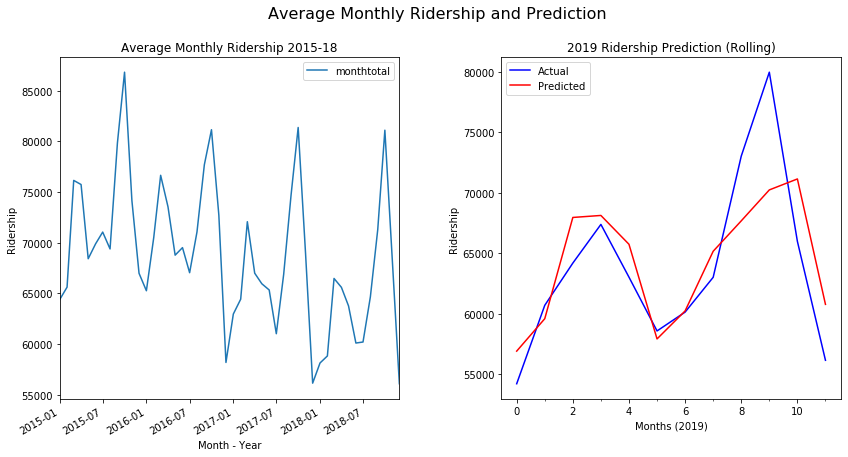

In [8]:
ARIMA.train_prediction() # For TRAIN STATION RIDERSHIP

### Reflections
1) The hardest part we encountered so far is predicting the values of ridership as they are influenced by several factors which can't be always included due to their short-term life.
2) Our intial insights are - There is a steady decline due to Cab Hailing services like Uber and Lyft and growing network of services like Metra and Pace. Also, trains are comparitively getting more popular due to their strong downtown network.
3) Concrete Results - We have successfully identified the features for prediction of ridership. We have also successfully identified the causes of sudden change in ridership.

4) Going Forward - The biggest Challange is to predict the neighbourhood which will gain/loose the traffic as it will require merging of KML data
5) We think we are on track with our project. We just need to strengthen our regression algorithm using Neural Networks and find a good way to divide the datasets in terms of area
6) Given our current insights, it is definetly worth proceding with the Project. We hope to gain meaning predictions to help CTA plan effectivly.

### Next Step
In coming months we will preict the ridership divided by routes and areas of operation. We will evalute our performance based on the unseen data of 2020 that CTA publish every month. It will also be interesting to know and predict the effect of Covid-19 lockdown on the Ridership.